<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/mathwithpython01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# メモ

1. python の sympy という数式処理のシステムを勉強する。
1. sympy で狙っているのは、数式レベルでシンボルを使った計算だが、数学の世界は広く、アプローチもさまざまなのでなんでもできるわけではない。
1. 一方、latex はどんな数式でも書ける。 latex を併用する。
1. 本家 SymPy Tutorial  (https://docs.sympy.org/latest/tutorial/index.html#tutorial)
1. 入力例で学ぶPython(SymPy)の使い方(入門) (https://pianofisica.hatenablog.com/entry/2019/04/04/183712)
1. Doing Math With Python PDF ( http://index-of.es/Varios-2/Doing%20Math%20with%20Python.pdf)
1. Doing Math With Python site (http://www.nostarch.com/doingmathwithpython/ )

# はじめに

数学と言っても広い話で、調べながらいろんな話題に進んでしまうとは思うものの、とりあえず思いついたことを書いておくと、興味の対象がわかっていいと思うので書いておく。

1. 数式。数学において数式を数学の世界で普通なように書くことは大事だと思う。$x^2$を `x**2` と書くとき、何が違うかというとフォントが違う、記号が違う。いまは$ \LaTeX$ で書いた。
1. 数式演算。$x$ に数を代入することはプログラミングでできて、手続き的にいろいろ複雑な計算もできるが、数式を数式自体で操作して、概念を抽象化して考えることが数学の本質の一部である。
1. sympy と別に python には numpy モジュールがあって計算に便利に使われる。 必要に応じて使う。
1. 図は matplotlib を使う。



# 数列の合計 シグマ $\Sigma$

In [ ]:
# python で数の合計は次のように書く 
sum ([12,34])

46

In [ ]:
# sympy に数の合計の記号シグマがある
from sympy import *
from sympy.abc import *
Sum(k, (k, 1, m))

Sum(k, (k, 1, m))

In [ ]:
Sum(k, (k, 1, m)).doit()

m**2/2 + m/2

In [ ]:
# 上記の出力を因数分解して次のようにしたい
# cf. factoring, expand, simplify
%%latex
\displaystyle
\frac{m(m+1)}{2}

<IPython.core.display.Latex object>

In [ ]:
# 因数分解は factor を使う
factor(Sum(k, (k, 1, m)).doit())

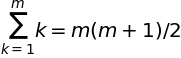

In [ ]:
# 完成品
Eq(Sum(k, (k, 1, m)), factor(Sum(k, (k, 1, m)).doit()))

# SymPy の歩き方

例えば、数列の合計シグマ $\Sigma$ を sympy でどう書くか、そもそも書けるのか、名前はなんというのか, Sigma なのか Sum なのか、関数として使えるのかただの記号なのか、というとき。

`from sympy import *` して、 dir() を出力する。  
出力をエディターにコピペして、それらしき命令を探す。  
Sum というのがあった。
コードセルで Sum を実行すると `sympy.concrete.summations.Sum` と出力される。 これを google で検索するとドキュメントが見られる。  
help(Sum) で help が見られる。

python の関数やメソッドは小文字 lower caracter で始まるのが原則なので、大文字で始まるのは sympy の出力のからんだ命令である。

あとは実験学習


In [ ]:
Sum

sympy.concrete.summations.Sum

# Abs を例に実験

In [ ]:
# Abs について実験
# sympy でシンボルに値が入っている場合、Abs は関数として働き、引数がシンボルの場合、数式処理システムとして働く
from sympy import *
from sympy.abc import *
display(Abs(x))
x = -3
display(Abs(x))
x = symbols('x')
display(Abs(x))
display(latex(Abs(x)))

'\\left|{x}\\right|'

In [ ]:
%%latex
\left|{x}\right|

<IPython.core.display.Latex object>

In [ ]:
# help(abs) によると、Abs がある場合、通常の組み込み関数 abs は Abs になる、とのことなので実験
abs(x) # => \left|{x}\right|

# 積分記号 Integral と微分記号 Derivative

積分するは integrate 微分するは diff


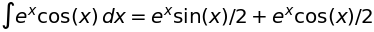

In [ ]:
from sympy import *
init_printing()

x = symbols ('x')
a = Integral (cos(x) *  exp(x), x)
Eq (a, a.doit())

今までの例からわかったこと。

1. `from sympy import *` でこれ以降なにもことわらずに四則演算をふくめ数学記号が sympy の演算子になっている。
1. `x = symbols('x')` は、python と共存するので、なんらかの宣言が必要なのはわかる。`x = 3`と入れたらそれ以降は `x` は 3 になって、また `x = symbols('x')` としたら `x` に戻った。 `from sympy.abc import *` という便利な道具もある。
3. 式で項の順序は維持されない。` Integral (cos(x) *  exp(x), x)` の `cos(x)`と`exp(x)`は数式表現になったときに順序が逆になっている。
4. `doit()`は数式レベルの計算というか、評価をするが、いま `((x + 2) * (x - 2)).doit()` としたら展開しなかった。メソッド `factor()`、`expand()` などを使う。


In [ ]:
from sympy import *
init_printing()

x = symbols ('x')
((x + 2) * (x - 2)).expand()

In [ ]:
((x + 2) * (x - 2))

In [ ]:
expand((x + 2) * (x - 2))

In [ ]:
from sympy import *
init_printing()
x = symbols ('x')
factor(x**2 - 4)

In [ ]:
integrate (cos(x) *  exp(x), x)

# sympy の出力は必ずしも理想的ではないので、latex で整形する


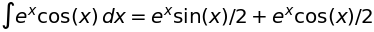

'\\int e^{x} \\cos{\\left(x \\right)}\\, dx = \\frac{\\left(\\sin{\\left(x \\right)} + \\cos{\\left(x \\right)}\\right) e^{x}}{2}'

In [ ]:
from sympy import *
init_printing()
x = symbols ('x')
a = Integral (cos(x) *  exp(x), x)
display(Eq (a, a.doit()))
latex(Eq (a, factor(a.doit())))

In [ ]:
%%latex
\displaystyle
\int e^{x} \cos{\left(x \right)}\, dx = \frac{e^{x} \sin{\left(x \right)}}{2} + \frac{e^{x} \cos{\left(x \right)}}{2}  \\
\int{e^x \cos (x)}dx = \frac{e^x}{2} \sin(x) +  \frac{e^x}{2} \cos(x) \\
\int e^{x} \cos{\left(x \right)}\, dx = \frac{\left(\sin{\left(x \right)} + \cos{\left(x \right)}\right) e^{x}}{2} \\
\int e^{x} \cos{\left(x \right)}\, dx = \frac{e^{x}}{2}\left(\sin{\left(x \right)} + \cos{\left(x \right)}\right) 

<IPython.core.display.Latex object>

`doit()`のヘルプを読んで見る。

In [ ]:
# `doit()`のヘルプを読んで見る。
from sympy import *
x = symbols('x')
help(x.doit)

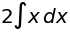

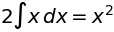

In [ ]:
# doit() の使い方。 doit(a) ではダメ。doit(deep=False) とかに使う。
from sympy import *
init_printing()
x = symbols ('x')
a = 2 * Integral (x, x)
display(a)
print()
display(a.doit())
print()
display(Eq(a, a.doit()))

`init_printing()`とすると、アウトプットが数式表示になる。

# 微分

微分の実験



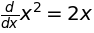

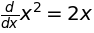

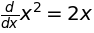

In [ ]:
# Derivative 微分の実験
from sympy import *
from sympy.abc import *
init_printing()
expr = x**2
display(Eq(Derivative(expr), expr.diff()))
print()
display(Eq(Derivative(expr), diff(expr)))
print()
display(Eq(Derivative(expr), (Derivative(expr)).doit()))

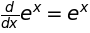

In [ ]:
Eq(Derivative(exp(x)), diff(exp(x)))

# 因数分解と式の展開

`factor()` と `expand()` を使ってみる。

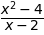

In [ ]:
from sympy import *
from sympy.abc import *
init_printing()
a = (x + 2) * (x - 2)
b = (x**2 - 4)
c = (x**2 - 4) / (x - 2)
display(a, b, c)

In [ ]:
factor((x**2 - 4))

In [ ]:
display(factor (b))
display(factor (c))

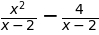

In [ ]:
display(expand (a))
display(expand (b))
display(expand (c))

In [ ]:
d = (x - 2)
b / d

式の因数分解や展開が全部自動化できるわけではない。

あたりまえだね。

In [ ]:
# 多項式はそれなりに並べ替えたり整理はしてくれる
display(x**2 + y**3 + x + x**3 + x**2 + y**4)
display(x * (x+1) ** 2 + y**3 *(y + 1))
display(expand(x * (x+1) ** 2 + y**3 *(y + 1)))


Rational() とか

In [ ]:
# Rational() とか
from sympy import *
Rational (3, 2)

In [ ]:
Rational(8, 4)

In [ ]:
sqrt(8)

数式のシンボルを事前に宣言する場合。


In [ ]:
# シンボルについて考察、実験
from sympy import *
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = symbols('f g h', cls=Function)


意味は多分、`x, y, z` は任意の変数、`f, m, n` は整数、`f, g, h` は関数ということだと思うが、`i, j`がない。

In [ ]:
from sympy import *
from sympy.abc import *
init_printing()
display(alpha, beta, chi, delta, epsilon, eta, gamma, iota, kappa, lamda, mu, nu, omega, omicron, phi, pi, psi, rho, sigma, tau, theta, upsilon, xi, zeta)

Rational()の中で変数は使えなかった

In [ ]:
# Rational(x, y) # => TypeError
display(x / y)

数式の割り算とか

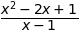

In [ ]:
(x**2 - 2 * x + 1) / (x - 1)

In [ ]:
factor((x**2 - 2 * x + 1) / (x - 1))

In [ ]:
factor ((x**2 - 2*x + 1)) / (x - 1)

In [ ]:
display(pi, i, e)

In [ ]:
pi.evalf()

In [ ]:
exp(1).evalf()

# ヘルプの求め方

`evalf()`の例では`evalf?`とか`evalf??`とかが簡単でよい。

`help(evalf)`もある。`help(x.evalf)`もある。

In [39]:
evalf?
# Adaptive numerical evaluation of SymPy expressions, using mpmath
# for mathematical functions.

In [38]:
evalf??

In [40]:
exp(1).evalf()

In [42]:
-oo.evalf()

In [43]:
-oo

# 式の簡素化

`simplification`というのか。自動でやられるのはごく単純な場合だけ。


# いまここ

In [ ]:
from sympy import *
init_printing(use_unicode=True)
x, y = symbols('x y')
expr = x + 2 * y
expand(x * expr)
factor (expand (x * expr))

In [ ]:
init_printing(use_unicode=True)
expr = (x ** 2 - 4) / (x - 2)
factor (expr)

In [ ]:
from sympy import *
init_printing(use_unicode=True)
x, t, z, nu = symbols ('x t z nu')

expr = sin (x) * exp(x)
expr

In [ ]:
diff(expr, x)

In [ ]:
integrate (exp(x)*sin(x) + exp(x)*cos(x))

In [ ]:
integrate (exp(x)*(sin(x) + cos(x)))

In [ ]:
integrate(sin(x**2), (x, -oo, oo))

In [ ]:
limit (sin(x)/x, x, 0)

###### $ \sqrt 2 $ を100桁まで計算しましょう
って、これまでの知識でできるか？  
こういう問題を出すのって教科書が悪いよね。  
本文で説明できていないことを練習問題で細くしたい、という気持ちはわかるが独習者を無視している。  
ひょっとするとevalf(100)とかか？  
とりあえず、$ \sqrt 2 $ を式にしよう。

In [ ]:
pi.evalf(100)

In [ ]:
2**(1/2)

In [ ]:
sqrt(2).evalf(100)

In [ ]:
val = 2**(1/2)
print("{0:.100f}".format(val))

1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


In [ ]:
# これはエラーになる
# val = sqrt(2)
# print("{0:.100f}".format(val))

In [ ]:
val = 2**(1/2)

In [ ]:
# 2**(1/2)はfloatなのでevalf()が使えない。exp表示にする必要がある
exp(ln(2) / 2).evalf(100)

In [ ]:
###### 1/2+1/3を有理数として計算する
Rational(1,2)+Rational(1,3)

In [ ]:
x + x + y + x

###### init_printingについて、テキストによっていろんな初期化をしている
sympy.init_printing(use_unicode=False, wrap_line=True)  
とか  
init_printing()  
とか  
from sympy.interactive import printing  
printing.init_printing(use_latex='mathjax')  
とか  
init_printing(use_latex=True)  
とか  

In [ ]:
expand((x+y)**5)

###### 変数入りの数式はベキが大きいのから小さいのに並べられるのはエラい

In [ ]:
3*x*y**2 + 3*y*x**2 + x**3 + y**3

In [ ]:
expand(x + y, complex = True)

###### 上のは複素数表記でドイツ文字の$ R $と$ I $を使っている
フラクトゥールというらしい
$$
\mathfrak R (x) + \mathfrak R (y) + i \mathfrak I x + \mathfrak I y
$$
だいたい合っているかな。

In [ ]:
%%script false
'''
Unit converter: Miles and Kilometers
'''
def print_menu():
  print('1. Kilometers to Miles')
  print('2. Miles to Kilometers')

def km_miles():
  km = float(input('Enter distance in kilometers: '))
  miles = km / 1.609

  print('Distance in miles: {0}'.format(miles))

def miles_km():
  miles = float(input('Enter distance in miles: '))
  km = miles * 1.609
  print('Distance in kilometers: {0}'.format(km))

if __name__ == '__main__':
  print_menu()
  choice = input('Which conversion would you like to do?: ')
if choice == '1':
  km_miles()
if choice == '2':
  miles_km()

### if __name__ == '__main__':
はノートブックにそぐわないみたい。  
取ってしまった方がいいみたい。  

そんなことを言えば、input()もノートブックにそぐわないみたい。  
input()があると評価がそのセルで止まってしまう。  
なるほど。

In [ ]:
'''
Quadratic equation root calculator
'''
def roots(a, b, c):
  D = (b*b - 4*a*c)**0.5
  x_1 = (-b + D)/(2*a)
  x_2 = (-b - D)/(2*a)
  print('x1: {0}'.format(x_1))
  print('x2: {0}'.format(x_2))

a, b, c = 1, 2, 1
roots(float(a), float(b), float(c))

x1: -1.0
x2: -1.0


###### (x+y)6 の展開形を計算する。

In [ ]:
from sympy import *
init_printing()
x, y = symbols("x,y")

expand((x + y)**6)

In [ ]:
simplify(x**6 + 6*x**5*y)

###### python表記に戻す init_printing()にはどうしたらよいか
アイデアは   
init_printing(use_pythonformat: True)  
x**2  
とか

init_printing(pretty_print=False)

でした。

In [ ]:
init_printing(pretty_print=False)
x**2

x**2

In [ ]:
expand((x + y)**6)

x**6 + 6*x**5*y + 15*x**4*y**2 + 20*x**3*y**3 + 15*x**2*y**4 + 6*x*y**5 + y**6

In [ ]:
# sin(x)/cos(x)を簡単化する
from sympy import *
init_printing()
x = symbols('x')
simplify(sin(x)/cos(x))

### simplifyの代替

簡単化とはいくぶん曖昧な用語のため、より目的を明確にした simplify の代替が存在する: powsimp (指数の簡単化), trigsimp (三角関数を含む数式), logcombine, radsimp, togeter.

In [ ]:
factor(x**2 + 2*x + 1)

In [ ]:
simplify(x**2 + 2*x + 2)

In [ ]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [ ]:
expand_trig(sin(x+y))

In [ ]:
trigsimp(sin(x)*cos(y)+sin(y)*cos(x))

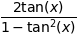

In [ ]:
expand_trig(tan(2*x))

In [ ]:
sqrt(x*y)

In [ ]:
ln(x)

In [ ]:
x, y = symbols('x y')
expand_log(log(x*y))

In [ ]:
x, y = symbols('x y', positive=True)
expand_log(log(x*y))

In [ ]:
x, y = symbols('x y')
expand_log(log(x*y), force=True)

In [ ]:
logcombine(log(x) + log(y), force=True)

In [ ]:
n=symbols('n')
logcombine(n*ln(x),force=True)

In [ ]:
x,y,z=symbols('x y z')
k, m, n = symbols('k m n')
factorial(n)

In [ ]:
binomial(n,k)

In [ ]:
binomial(5,3)

In [ ]:
gamma(z)

In [ ]:
gamma(10)

In [ ]:
factorial(9)

これは`LaTeX`
</br></br>

$$
\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt
$$


In [ ]:
%%latex
\displaystyle

\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t},dt

<IPython.core.display.Latex object>

In [ ]:
# hyper([a_1, ..., a_p], [b_1, ..., b_q], z)
# hypergeometric function
hyper([1,2],[3],z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

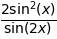

In [ ]:
# rewrite
tan(x).rewrite(sin)

In [ ]:
factorial(x).rewrite(gamma)
# For some tips on applying more targeted rewriting, see the Advanced Expression Manipulation section

In [ ]:
expand_func(gamma(x + 3))

In [ ]:
hyperexpand(hyper([1,1],[2],z))

In [ ]:
expr = meijerg([[1],[1]], [[1],[]],-z)
expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [ ]:
hyperexpand(expr)

In [ ]:
n , k = symbols('n k', integer=True)
combsimp(factorial(n)/factorial(n - 3))

In [ ]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

In [ ]:
gammasimp(gamma(x)*gamma(1 - x))

### sympyのtutorial

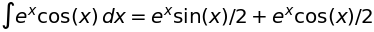

In [ ]:
from sympy import *
init_printing()
x = symbols('x')
a = Integral(cos(x)*exp(x),x)
Eq(a, a.doit())

In [ ]:
a.doit()

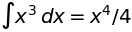

In [ ]:
b = Integral(x**3)
Eq(b, b.doit())

### Sympy Tutorialに移りました

In [ ]:
from sympy import *
init_printing()
x, t, z, nu, y = symbols('x t z nu y')

diff(sin('x')*exp(x),x)

In [ ]:
diff(x**2)

In [ ]:
diff(sin('x')*exp(x))

In [ ]:
exp(x)

In [ ]:
exp(1)

In [ ]:
diff(exp(x))

In [ ]:
exp(1).evalf()

In [ ]:
expand_trig(sin(x + y))

In [ ]:
expand_trig(sin(2*x))

In [ ]:
expand_trig(cos(x + y))

In [ ]:
expand_trig(cos(2*x))

In [ ]:
expand_trig(sin(3*x))

In [ ]:
integrate(exp(x)*sin(x) + exp(x)*cos(x))

In [ ]:
integrate(sin(x**2),(x,-oo, oo))

In [ ]:
limit(sin(x)/x, x, 0)

In [ ]:
from sympy import *
init_printing()
x = symbols('x')
display(factor(x**2 - 4))
display(factor(x**2 - 2))

In [ ]:
solve(x**2 - 2, x)

In [ ]:
# solve the differential equation y'' - y = e^t
from sympy import *
init_printing()
x, y ,z, t = symbols('x y z t')
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

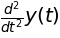

In [ ]:
y(t).diff(t,t)

### eigenvals()

In [ ]:
Matrix([[1,2],[2,2]]).eigenvals()

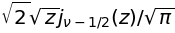

In [ ]:
from sympy import *
init_printing()
x, y ,z, nu, t = symbols('x y z nu t')

besselj(nu,z).rewrite(jn)

In [ ]:
besselj(nu, z)

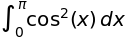

In [ ]:
Integral(cos(x)**2,(x,0,pi))

In [ ]:
integrate(cos(x)**2,(x,0,pi))

In [ ]:
from sympy import*
init_printing()
x = symbols('x')
expr = x + 1
expr.subs(x,2)

In [ ]:
x

In [ ]:
Eq((x + 1)**2, x**2 + 2*x + 1)

In [ ]:
solve(Eq((x + 1)**2, 2*x))

In [ ]:
(x + 1)**2 == (x**2 + 2*x + 1)

False

In [ ]:
expand((x + 1)**2) == (x**2 + 2*x + 1)

True

In [ ]:
a = (x + 1)**2
b = x**2 + 2*x + 1
a

In [ ]:
a - b

In [ ]:
simplify(a - b)

In [ ]:
if simplify(a - b) == 0:
    print ("right")
else:
    print ("no")

right


In [ ]:
a.equals(b)

True

In [ ]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

In [ ]:
x^y

In [ ]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [ ]:
Integer(3)

In [ ]:
type(1 +  1)

int

In [ ]:
Integer(3) / Integer(2)

In [ ]:
3/2

In [ ]:
# from __future__ import division
1/2

In [ ]:
Rational(1,2)

In [ ]:
x  + 1/2

### 代入

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
expr = cos(x) + 1
expr.subs(x, y)

In [ ]:
expr.subs(x, 0)

In [ ]:
expr = x ** y
expr

In [ ]:
expr = expr.subs(y, x**y)
expr


In [ ]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

In [ ]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

### 多重代入

In [ ]:
from sympy import*
init_printing()
x,y,z,t = symbols('x y z t')
expr = x**3 + 4*x*y - z
expr.subs([(x,2),(y,4),(z,0)])

In [ ]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

In [ ]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 ==0]
print (replacements)
display(expr.subs(replacements))

[(1, 1), (x**2, y**2), (x**4, y**4)]


### sympify

In [ ]:
str_expr = "x**2+ 3*x - 1/2"
expr = sympify(str_expr)
expr

In [ ]:
expr.subs(x,2)

### evalf

In [ ]:
sqrt(8).evalf()

In [ ]:
E.evalf()

In [ ]:
pi.evalf(100)

In [ ]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

In [ ]:
expr.subs(x,2.4).evalf()

In [ ]:
one = cos(1)**2 + sin(1)**2
(one - 1).evalf(chop=True)

In [ ]:
one = cos(1)**2 + sin(1)**2
(one - 1).evalf()

###  lambdify
`lambdify` どんなときに役にたつのだろうか。

まあいいか。進もう。

In [ ]:
import numpy
a = numpy.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
range (10)

range(0, 10)

In [ ]:
range(0, 10)[3]

In [ ]:
a[3]

3

In [ ]:
list(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(range(0, 10))

In [ ]:
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
f = lambdify(x, expr, "math")
f(0.1)

In [ ]:
lambdify?

### sympy_name:numerical_function pairs

In [ ]:
def mysin(x):
    """
    My sine. Note that this is only accurate for small x.
    """
    return x
f = lambdify(x, expr, {"sin":mysin})
f(0.1)

### printing

str, srepr, ASCII pretty printer, Unicode pretty printer, LaTeX, MathML, Dot

init_session() works
1. frm sympy import *
2. init_printing()
3. common symbols


In [ ]:
from sympy import *
init_session()

IPython console for SymPy 1.7.1 (Python 3.7.10-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.7.1/



### continued fractions


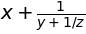

In [ ]:
from sympy import *
init_printing()
x,y,z = symbols('x y z')

def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1 / expr
    return l[0] + expr
frac = list_to_frac([x,y,z])
frac

In [ ]:
list_to_frac([1,2,3,4])

In [ ]:
syms = symbols('a0:5')
syms

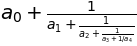

In [ ]:
a0, a1, a2, a3, a4 = syms

frac = list_to_frac(syms)
frac

In [ ]:
# 実験
from sympy import *
init_printing()
a11 = symbols('a11')
display (a11)
display(symbols('a_11'))

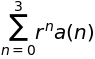

In [ ]:
# 実験
from sympy import *
init_printing()
a_seq = [-1, 3, 23, 8]
n, r = symbols('n, r')
a_n = Function('a')(n)
terms = 4
short_expr = Sum(a_n * r**n, (n, 0, terms - 1))
display(short_expr)
# coeffed_short_expr = short_expr.doit().subs(
#     (a_n.subs(n, i), a_seq[i]) for i in range(terms)) # 8*r**3 + 23*r**2 + 3*r - 1
# func_short_expr = lambdify(r, coeffed_short_expr, 'numpy')

In [ ]:
# 実験
from sympy import *
init_printing()
a = symbols('a', shape=(3,3))
display(a)

### cancel

In [ ]:
frac=cancel(frac)
frac

frac

In [ ]:
%%script false
l=[]
frac = apart(frac, a0)
frac

In [ ]:
%%script false
l.append(a0)
frac = 1/(frac - a0)
frac

In [ ]:
%%script false
frac = apart(frac, a1)
frac

In [ ]:
%%script false
l.append(a1)
frac = 1/(frac - a1)
frac = apart(frac, a2)
frac

In [ ]:
%%script false
l.append(a2)
frac = 1/(frac - a2)
frac = apart(frac, a3)
frac

In [ ]:
%%script false
l.append(a3)
frac = 1/(frac - a3)
frac = apart(frac, a4)
frac

In [ ]:
%%script false
l.append(a4)
list_to_frac(l)

In [ ]:
%%script false
l

###  random

In [ ]:
import random
l = list(symbols('a0:5'))
random.shuffle(l)
orig_frac = frac = cancel(list_to_frac(l))
del l

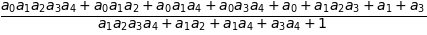

In [ ]:
frac

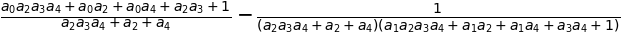

In [ ]:
l=[]
frac = apart(frac, a1)
frac

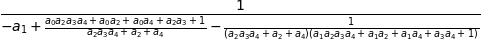

In [ ]:
l.append(a1)
frac = 1/(frac - a1)
frac

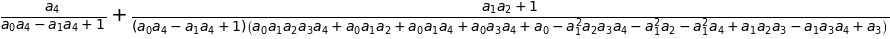

In [ ]:
frac = apart(frac, a3)
frac

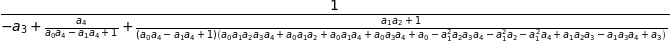

In [ ]:
l.append(a3)
frac = 1/(frac - a3)
frac

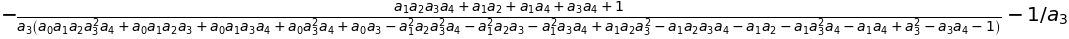

In [ ]:
frac = apart(frac, a0)
frac

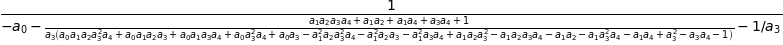

In [ ]:
l.append(a0)
frac = 1/(frac - a0)
frac

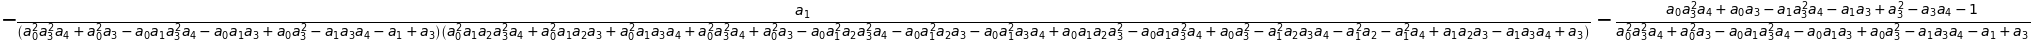

In [ ]:
frac = apart(frac, a2)
frac

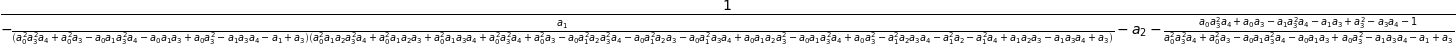

In [ ]:
l.append(a2)
frac = 1/(frac - a2)
frac

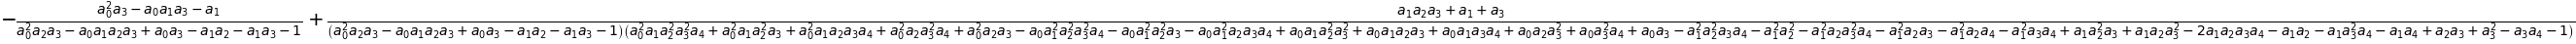

In [ ]:
frac = apart(frac, a4)
frac

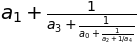

In [ ]:
l.append(a4)
list_to_frac(l)

In [ ]:
l

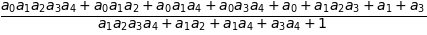

In [ ]:
orig_frac

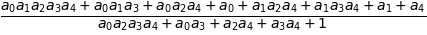

In [ ]:
cancel(list_to_frac(l))